In [2]:
"""
    ans = mytrapezoids(fun, a, b, n)

Numerically evaluate the integral int_a^b fun(x) dx using the
trapezoidal rule: I = h/2*(f_1 + 2f_2 + ... + 2f_{n-1} + f_n),
where h = (b - a)/(n - 1), x_i = a + (i - 1)*h, f_i = fun(x_i).
"""
function mytrapezoids(fun, a, b, n)
    h = (b - a)/(n - 1)
    s1 = fun(a) + fun(b)
    s2 = 0.0
    for i = 2:(n-1)
        s2 += fun(a + h*(i-1))
    end
    return h/2*(s1 + 2*s2)
end

mytrapezoids

In [3]:
?mytrapezoids

search: mytrapezoids



```
ans = mytrapezoids(fun, a, b, n)
```

Numerically evaluate the integral int*a^b fun(x) dx using the trapezoidal rule: I = h/2*(f*1 + 2f*2 + ... + 2f*{n-1} + f*n), where h = (b - a)/(n - 1), x*i = a + (i - 1)*h, f*i = fun(x*i).


In [4]:
fun1(x) = 1/x
a1 = 1.0
b1 = 2.0
exact1 = log(2)
np1 = 20

20

In [5]:
res1 = mytrapezoids(fun1, a1, b1, np1)

0.6933202508885106

In [6]:
round(abs(res1 - exact1), sigdigits=1)

0.0002

In [7]:
fun2(x) = exp(x)
a2 = 0.0
b2 = 1.0
exact2 = exp(1) - 1.0
np2 = 100

100

In [8]:
res2 = mytrapezoids(fun2, a2, b2, np2)

1.718296438183449

In [9]:
round(abs(res2 - exact2), sigdigits=1)

1.0e-5

In [10]:
fun3(x) = sin(x)
a3 = 0.0
b3 = pi
exact3 = 2.0

2.0

In [11]:
ndp = 10
hh = zeros(ndp) # create an array of ndp elements
abserrs = zeros(ndp);

In [12]:
for i = 1:ndp
    np = 2^i + 1
    hh[i] = (b3 - a3)/(np - 1)
    abserrs[i] = abs(mytrapezoids(fun3, a3, b3, np) - exact3)
end 

In [13]:
abserrs

10-element Vector{Float64}:
 0.42920367320510344
 0.1038811020629602
 0.025768398054449193
 0.006429656227660452
 0.0016066390298559163
 0.00040161135996252817
 0.00010039981579623714
 2.5099764946912018e-5
 6.274929423177866e-6
 1.5687316166079768e-6

In [14]:
using PyPlot

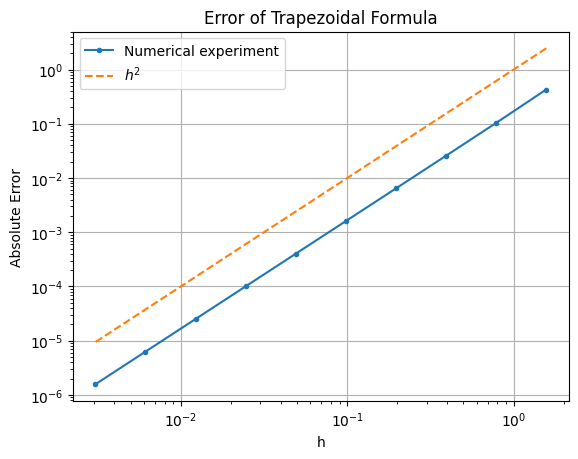

In [15]:
loglog(hh, abserrs, marker=".", label="Numerical experiment")
loglog(hh, hh.^2, linestyle="dashed", label=L"h^2")
grid(true)
xlabel("h")
ylabel("Absolute Error")
title("Error of Trapezoidal Formula")
legend();

In [16]:
function mytrapezoids2(fv, h)
    return h/2*(fv[1] + fv[end] + 2*sum(fv[2:(end-1)]))
end

mytrapezoids2 (generic function with 1 method)

In [17]:
x1 = range(a1, b1, np1)
fv1 = fun1.(x1)
h1 = x1[2] - x1[1]
round(abs(mytrapezoids2(fv1, h1) - exact1), sigdigits=1)

0.0002

In [18]:
x2 = range(a2, b2, np2)
fv2 = fun2.(x2)
h2 = x2[2] - x2[1]
round(abs(mytrapezoids2(fv2, h2) - exact2), sigdigits=1)

1.0e-5

In [25]:
function simpsons2(fun, a, b, n)
    x = range(a, b, n)
    fv = fun.(x)
    h = x[2] - x[1]
    th = mytrapezoids2(fv, h)
    t2h = mytrapezoids2(fv[1:2:n], 2*h)
    return (4*th - t2h)/3
end

simpsons2 (generic function with 1 method)

In [26]:
nps1 = 19
round(abs(simpsons2(fun1, a1, b1, nps1) - exact1),  sigdigits=1)

3.0e-7

In [28]:
nps2 = 99
round(abs(simpsons2(fun2, a2, b2, nps2) - exact2),  sigdigits=1)

1.0e-10

In [30]:
nn = 500
round(abs(mytrapezoids(fun1, a1, b1, nn) - exact1), sigdigits=1)

3.0e-7

In [34]:
function mysimpsons(n)
    if iseven(n) || n<3
        return Inf
    end
    return 0
end

mysimpsons (generic function with 2 methods)

In [39]:
mysimpsons(7)

0